<a href="https://colab.research.google.com/github/Faisal-javed-khan/NLP-PROJECT/blob/main/classsification__pipeline_sentiment_analysis_some_other_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>A Simple Classier Without the Text Classification Pipeline


In [ ]:
# create lists for positve and negatives
pos_list=["happy", "joyful", "excited", "wonderful", "amazing", "fantastic",
    "excellent", "great", "good", "awesome", "beautiful", "delightful",
    "pleasure", "satisfied", "love", "positive", "admire", "vibrant", "fabulous"]
neg_list=["horrible", "terrible", "awful", "bad", "disappointing", "poor"]

In [ ]:
def sent_classification(tweet):
  #in future we will test a tweet so we will split that
  words=tweet.split()

  #initializ for to count the pos  and neg
  pos_score=0
  neg_score=0

  for word in words:
    if word in pos_list:
      pos_score +=1
    elif word in neg_list:
      neg_score +=1

  if pos_score> neg_score:
    return "positve"

  elif neg_score > pos_score:
    return "negative"

  else:
    return "Neutral"



In [ ]:
# check and test your function
tweet1=" i am happy to here  this is a good place ever"
tweet2="i am angry on this horrible place "
tweet3="the is enough to eat some veg. and fishi food"

sentiment1=sent_classification(tweet1)
sentiment2=sent_classification(tweet2)
sentiment3=sent_classification(tweet3)

print(sentiment1)
print(sentiment2)
print(sentiment3)

positve
negative
Neutral


<h1><b>this is just for the pratice to loop the multiple  test data to che ck thier sentiment analyzer

In [ ]:
from numpy.matrixlib import test
test_data=[tweet1 , tweet2 , tweet3]
for _ in test_data:
  print(sent_classification(_))

positve
negative
Neutral


<h1><b> pipline for the classification (Text Classification with Naive Bayes, Logistic Regression, SVM)

1. Collect or create a labeled dataset suitable for the task.
2. Split the dataset into two (training and test) or three parts: training, validation
(i.e., development), and test sets, then decide on evaluation metric(s).
3. Transform raw text into feature vectors.
4. Train a classifier using the feature vectors and the corresponding labels from the
training set.
5. Using the evaluation metric(s) from Step 2, benchmark the model performance
on the test set.
6. Deploy the model to serve the real-world use case and monitor its performance

<h1><b> NAive bayes Classification

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from nltk.corpus import stopwords

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [ ]:
try:
    from google.colab import files
    !wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
    !ls -lah DATAPATH
    our_data = pd.read_csv("DATAPATH/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )

except ModuleNotFoundError:
    our_data = pd.read_csv("Data/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )

--2023-09-25 10:26:43--  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12383529 (12M) [text/plain]
Saving to: ‘DATAPATH/Full-Economic-News-DFE-839861.csv’

Full-Economic-News- 100%[===================>]  11.81M  --.-KB/s    in 0.03s   

2023-09-25 10:26:44 (397 MB/s) - ‘DATAPATH/Full-Economic-News-DFE-839861.csv’ saved [12383529/12383529]

total 12M
drwxr-xr-x 2 root root 4.0K Sep 25 10:26 .
drwxr-xr-x 1 root root 4.0K Sep 25 10:26 ..
-rw-r--r-- 1 root root  12M Sep 25 10:26 Full-Economic-News-DFE-839861.csv


In [ ]:
our_data.shape

(8000, 15)

In [ ]:
print("here we find the cassification distribution ")
print(our_data["relevance"].value_counts()/our_data.shape[0])
print("There is an imbalance in the data with not relevant being 82% in the dataset")

here we find the cassification distribution 
no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64
There is an imbalance in the data with not relevant being 82% in the dataset


In [ ]:
# convert label to a numerical variable
our_data = our_data[our_data.relevance != "not sure"] # removing the data where we don't want relevance="not sure".
our_data.shape
our_data['relevance'] = our_data.relevance.map({'yes':1, 'no':0}) # relevant is 1, not-relevant is 0.
our_data = our_data[["text","relevance"]] # Let us take only the two columns we need.
our_data.shape

(7991, 2)

In [ ]:
our_data["relevance"].shape, our_data

((7991,),
                                                    text  relevance
 0     NEW YORK -- Yields on most certificates of dep...          1
 1     The Wall Street Journal Online</br></br>The Mo...          0
 2     WASHINGTON -- In an effort to achieve banking ...          0
 3     The statistics on the enormous costs of employ...          0
 4     NEW YORK -- Indecision marked the dollar's ton...          1
 ...                                                 ...        ...
 7995  Secretary of Commerce Charles W. Sawyer said y...          1
 7996  U.S. stocks inched up last week, overcoming co...          0
 7997  Ben S. Bernanke cleared a key hurdle Thursday ...          0
 7998  The White House's push to contract out many fe...          0
 7999  NEW YORK. April 17-Automobile stocks put on th...          0
 
 [7991 rows x 2 columns])

<h1><b> Text Pre-processing


Typical steps involve tokenization, lower casing, removing, stop words, punctuation markers etc, and vectorization. Other processes such as stemming/lemmatization can also be performed. Here, we are performing the following steps: removing br tags, punctuation, numbers, and stopwords. While we are using sklearn's list of stopwords, there are several other stop word lists (e.g., from NLTK) or sometimes, custom stopword lists are needed depending on the task.

In [ ]:
stopwords = ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

<h1><b>Modeling


Now we are ready for the modelling. We are going to use algorithms from sklearn package. We will go through the following steps:

1 Split the data into training and test sets (75% train, 25% test)
2 Extract features from the training data using CountVectorizer, which is a bag of words feature implementation. We will use the pre-processing function above in conjunction with Count Vectorizer
3 Transform the test data into the same feature vector as the training data.
4 Train the classifier
5 Evaluate the classifier

In [ ]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = our_data.text # the column text contains textual data to extract features from
y = our_data.relevance # this is the column we are learning to predict.
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)


In [ ]:
X.shape , y.shape , X_train.shape , X_test.shape , y_train.shape,y_test.shape

((7991,), (7991,), (5993,), (1998,), (5993,), (1998,))

In [ ]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
# i.e., the dimension of our feature vector is 49753

(5993, 49753) (1998, 49753)


<h1><b> Training  with Naive bayes

In [ ]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 11.1 ms, sys: 2 µs, total: 11.1 ms
Wall time: 19.4 ms


In [ ]:
y_pred_class.shape

(1998,)

Draw Confusion matrix

Accuracy:  0.7822822822822822
ROC_AOC_Score:  0.7251117679464362
____________________________________________________________________________________________________
we can notice that the classifier is doing poorly with identifying relevant articles,
 while it is doing well with non-relevant ones. Our large feature vector could be creating a lot of
  noise in the form of very rarely occurring features that are not useful for learning. Let us change the count 
  vectorizer to take a certain number of features as maximum.
____________________________________________________________________________________________________


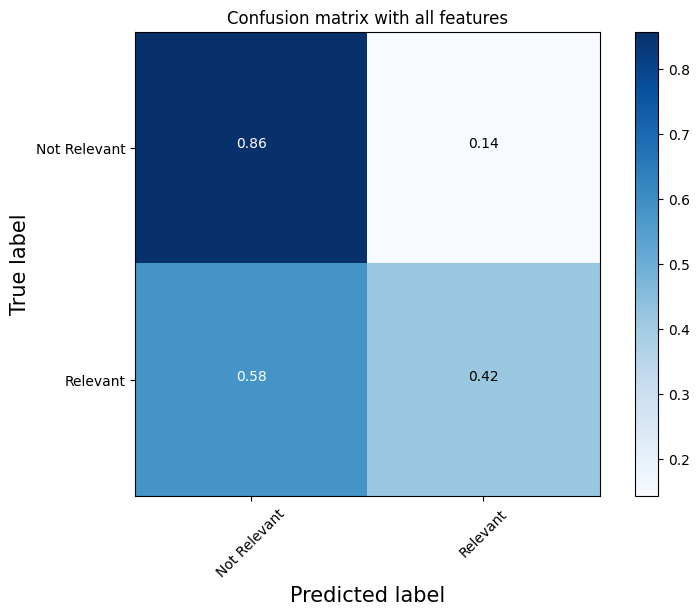

In [ ]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix.
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)


# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))


# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))
print("_"*100)

print("""we can notice that the classifier is doing poorly with identifying relevant articles,
 while it is doing well with non-relevant ones. Our large feature vector could be creating a lot of
  noise in the form of very rarely occurring features that are not useful for learning. Let us change the count
  vectorizer to take a certain number of features as maximum.""")
print("_"*100)

CPU times: user 4.31 ms, sys: 0 ns, total: 4.31 ms
Wall time: 4.32 ms
Accuracy:  0.6876876876876877


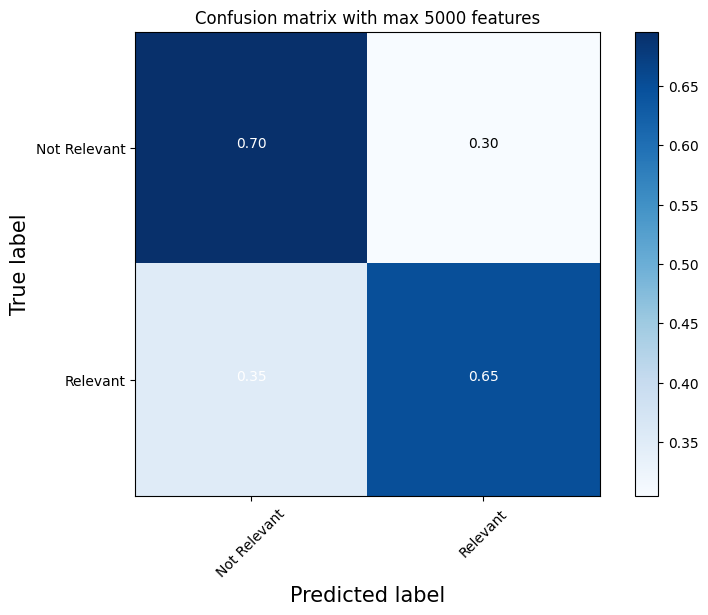

In [ ]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with max 5000 features')

<h1><b> Logistic Reggression

Accuracy:  0.7367367367367368
AUC:  0.7251117679464362


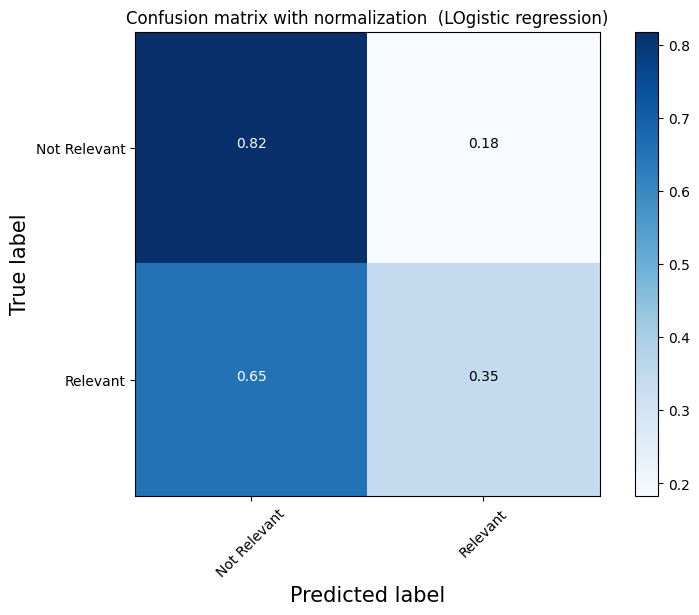

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization  (LOgistic regression)')

max_features =1000 to reduce the sparsity in model

Accuracy:  0.6871871871871872
AUC:  0.7251117679464362


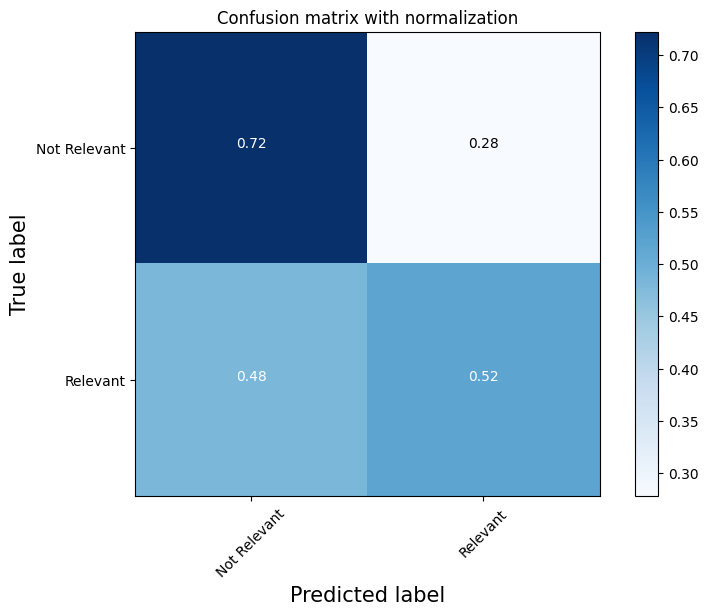

In [ ]:
from sklearn.linear_model import LogisticRegression # import


vect = CountVectorizer(preprocessor=clean, max_features=1000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

<h1><b> now lets try another  classifier linear SVC OR SVM

Accuracy:  0.6866866866866866
AUC:  0.7251117679464362


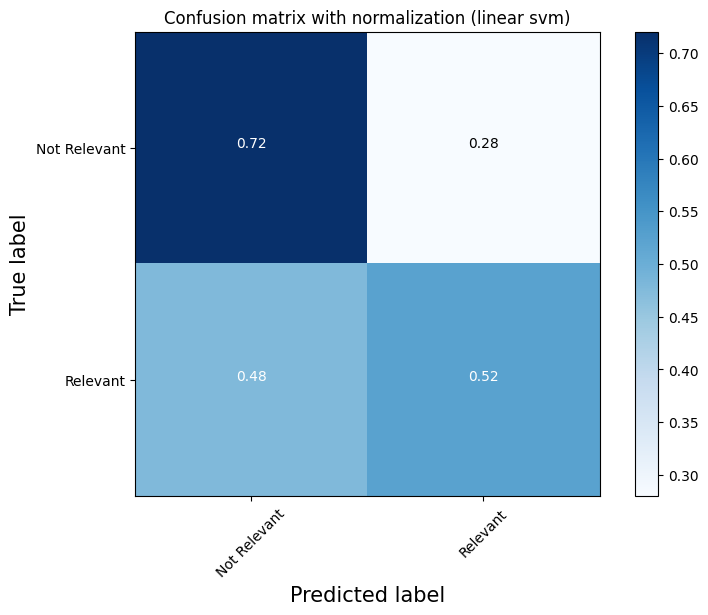

In [ ]:
from sklearn.svm import LinearSVC

vect = CountVectorizer(preprocessor=clean, max_features=1000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization (linear svm)')

<h1><b>Sentiment AnALYSIS

In [ ]:
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist, classify, NaiveBayesClassifier

In [ ]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load positive and negative Twitter datasets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
positive_tweets[10]
negative_tweets[10]

"realli good & g idea i'm never go meet :( ( ("

In [ ]:
# Tokenization and preprocessing
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
def preprocess_tweet(tweet):
    tokens = tokenizer.tokenize(tweet)
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

In [ ]:

positive_tweets = [preprocess_tweet(tweet) for tweet in positive_tweets]
negative_tweets = [preprocess_tweet(tweet) for tweet in negative_tweets]


In [ ]:
len(positive_tweets)

5000

In [ ]:

# Create a list of tuples (tweet, label) where label is 'pos' for positive and 'neg' for negative
tweets = [(tweet, 'pos') for tweet in positive_tweets] + [(tweet, 'neg') for tweet in negative_tweets]

In [ ]:
len(tweets)

10000

In [ ]:

# Create a feature extractor
def get_features(text):
    words = tokenizer.tokenize(text)
    features = {}
    for word in words:
        features[word] = True
    return features

# Build the feature set
featuresets = [(get_features(tweet), label) for (tweet, label) in tweets]


In [ ]:
featuresets[7]

({'second': True,
  'thought': True,
  ',': True,
  '’': True,
  'enough': True,
  'time': True,
  'dd': True,
  ':)': True,
  'new': True,
  'short': True,
  'enter': True,
  'system': True,
  '.': True,
  'sheep': True,
  'must': True,
  'buy': True},
 'pos')

In [ ]:

# Split the data into a training and testing set
split_ratio = 0.8
split_index = int(len(featuresets) * split_ratio)
train_set, test_set = featuresets[:split_index], featuresets[split_index:]


In [ ]:
split_index , len(train_set) , len(test_set)

(8000, 8000, 2000)

In [ ]:
# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

In [ ]:
# Evaluate the classifier
accuracy = classify.accuracy(classifier, test_set)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 99.60%


In [ ]:
# Example usage: Predict sentiment of a custom tweet
custom_tweet = "u r crazy"
custom_tweet = preprocess_tweet(custom_tweet)
features = get_features(custom_tweet)
sentiment = classifier.classify(features)
print(f'Sentiment: {sentiment}')

Sentiment: pos


<H1>use GENISM TO PREDICT THE SIMILAR WORDS

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# define training data
#Genism word2vec requires that a format of ‘list of lists’ be provided for training where every document contained in a list.
#Every list contains lists of tokens of that document.
corpus = [['dog','bites','man'], ["man", "bites" ,"dog"],["dog","eats","meat"],["man", "eats","food"]]

#Training the model
model_cbow = Word2Vec(corpus, min_count=1,sg=0) #using CBOW Architecture for trainnig
model_skipgram = Word2Vec(corpus, min_count=1,sg=1)#using skipGram Architecture for training

<h1>Continuous Bag of Words (CBOW)

In CBOW, the primary task is to build a language model that correctly predicts the center word given the context words in which the center word appears.



In [ ]:
#Summarize the loaded model
print(model_cbow)

#Summarize vocabulary
words = list(model_cbow.wv.index_to_key)

print(words)

#Acess vector for one word
print(model_cbow.wv['dog'])



Word2Vec<vocab=6, vector_size=100, alpha=0.025>
['man', 'dog', 'eats', 'bites', 'food', 'meat']
[-8.6196875e-03  3.6657380e-03  5.1898835e-03  5.7419385e-03
  7.4669183e-03 -6.1676754e-03  1.1056137e-03  6.0472824e-03
 -2.8400505e-03 -6.1735227e-03 -4.1022300e-04 -8.3689485e-03
 -5.6000124e-03  7.1045388e-03  3.3525396e-03  7.2256695e-03
  6.8002474e-03  7.5307419e-03 -3.7891543e-03 -5.6180597e-04
  2.3483764e-03 -4.5190323e-03  8.3887316e-03 -9.8581640e-03
  6.7646410e-03  2.9144168e-03 -4.9328315e-03  4.3981876e-03
 -1.7395747e-03  6.7113843e-03  9.9648498e-03 -4.3624435e-03
 -5.9933780e-04 -5.6956373e-03  3.8508223e-03  2.7866268e-03
  6.8910765e-03  6.1010956e-03  9.5384968e-03  9.2734173e-03
  7.8980681e-03 -6.9895042e-03 -9.1558648e-03 -3.5575271e-04
 -3.0998408e-03  7.8943167e-03  5.9385742e-03 -1.5456629e-03
  1.5109634e-03  1.7900408e-03  7.8175711e-03 -9.5101865e-03
 -2.0553112e-04  3.4691966e-03 -9.3897223e-04  8.3817719e-03
  9.0107834e-03  6.5365066e-03 -7.1162102e-04  7.7

In [ ]:

#Compute similarity
# Compute similarity
print("Similarity between eats and bites:", model_cbow.wv.similarity('eats', 'bites'))
print("Similarity between eats and man:", model_cbow.wv.similarity('eats', 'man'))


Similarity between eats and bites: -0.01349709
Similarity between eats and man: -0.052354358


In [ ]:
#Most similarity
model_cbow.wv.most_similar('meat')

[('food', 0.13887985050678253),
 ('bites', 0.13149003684520721),
 ('eats', 0.06422408670186996),
 ('dog', 0.009391166269779205),
 ('man', -0.05987630784511566)]

<h1>SkipGram


In skipgram, the task is to predict the context words from the center word.



In [ ]:
#Summarize the loaded model
print(model_skipgram)

#Summarize vocabulary
words = list(model_skipgram.wv.index_to_key)
print(words)

#Acess vector for one word
print(model_skipgram.wv['dog'])

Word2Vec<vocab=6, vector_size=100, alpha=0.025>
['man', 'dog', 'eats', 'bites', 'food', 'meat']
[-8.6196875e-03  3.6657380e-03  5.1898835e-03  5.7419385e-03
  7.4669183e-03 -6.1676754e-03  1.1056137e-03  6.0472824e-03
 -2.8400505e-03 -6.1735227e-03 -4.1022300e-04 -8.3689485e-03
 -5.6000124e-03  7.1045388e-03  3.3525396e-03  7.2256695e-03
  6.8002474e-03  7.5307419e-03 -3.7891543e-03 -5.6180597e-04
  2.3483764e-03 -4.5190323e-03  8.3887316e-03 -9.8581640e-03
  6.7646410e-03  2.9144168e-03 -4.9328315e-03  4.3981876e-03
 -1.7395747e-03  6.7113843e-03  9.9648498e-03 -4.3624435e-03
 -5.9933780e-04 -5.6956373e-03  3.8508223e-03  2.7866268e-03
  6.8910765e-03  6.1010956e-03  9.5384968e-03  9.2734173e-03
  7.8980681e-03 -6.9895042e-03 -9.1558648e-03 -3.5575271e-04
 -3.0998408e-03  7.8943167e-03  5.9385742e-03 -1.5456629e-03
  1.5109634e-03  1.7900408e-03  7.8175711e-03 -9.5101865e-03
 -2.0553112e-04  3.4691966e-03 -9.3897223e-04  8.3817719e-03
  9.0107834e-03  6.5365066e-03 -7.1162102e-04  7.7

In [ ]:
#Compute similarity
print("Similarity between eats and bites:",model_skipgram.wv.similarity('dog', 'bites'))
print("Similarity between eats and man:",model_skipgram.wv.similarity('eats', 'food'))

Similarity between eats and bites: 0.06797594
Similarity between eats and man: 0.17018515


In [ ]:
#Most similarity
model_skipgram.wv.most_similar('meat')

[('food', 0.13887983560562134),
 ('bites', 0.13149002194404602),
 ('eats', 0.06406080722808838),
 ('dog', 0.009391166269779205),
 ('man', -0.059876300394535065)]

<h1> avg vector for the text

In [ ]:
import spacy
import en_core_web_sm

nlp=en_core_web_sm.load()

doc=nlp("this is awsome worlds when u smile")

print(doc.vector)#Averaged vector for the entire sentence

[ 0.20565714  0.07371444 -0.32465586  0.1236725   0.11249573 -0.01572216
  0.71251285  0.48365662  0.06424249 -0.31562737  0.26362434  0.03863521
 -0.08529603  0.00591969 -0.5651911  -0.22939722 -0.20026554  0.22763412
 -0.64452237  0.37436557 -0.0743953   0.03216047 -0.21705833 -0.39851072
  0.31298098  0.17894697  0.04933827  0.625294    0.18723989 -0.23962517
 -0.24685887  0.34034422 -0.06309833 -0.27915064  0.00343917 -0.45175698
  0.07449637  0.3501102   0.35836893  0.27457374 -0.22804913  0.17068508
 -0.23000431  0.20914438  0.29271814 -0.00984285  0.3841686   0.21539725
 -0.04241136 -0.53034925 -0.24237607 -0.08218396 -0.29115152 -0.76526827
  0.0567222  -0.14963739  0.16644098 -0.04547418  0.24576637  0.5754873
  0.51255214 -0.32762036  0.03964809 -0.72837406  0.36051193  0.41950265
  0.683589   -0.23876233  0.35333648 -0.07967325  0.3190822  -0.12900604
  0.11898901 -0.307509   -0.43132025  0.27672625 -0.05841332 -0.2972363
 -0.22117142 -0.08213149 -0.57897747 -0.05792673  0.0

In [ ]:
len(doc[4].vector)

96

<H1> t-SNE

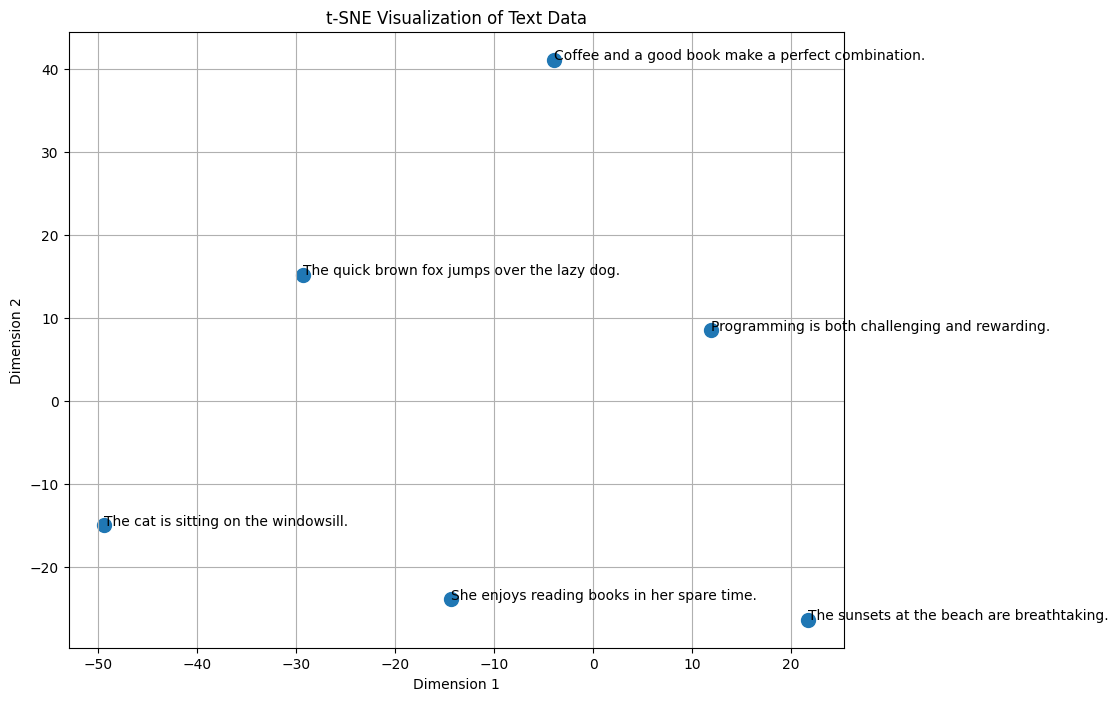

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Example text data and random word embeddings (replace with your data)
text_data = [
    "The quick brown fox jumps over the lazy dog.",
    "The cat is sitting on the windowsill.",
    "She enjoys reading books in her spare time.",
    "The sunsets at the beach are breathtaking.",
    "Programming is both challenging and rewarding.",
    "Coffee and a good book make a perfect combination.",
]

# Generate random word embeddings for the example sentences (replace with your embeddings)
# In practice, you would load pre-trained embeddings or generate your own
num_sentences = len(text_data)
embedding_dim = 50  # Example embedding dimension
random_embeddings = np.random.rand(num_sentences, embedding_dim)

# Perform t-SNE dimensionality reduction with reduced perplexity
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
tsne_result = tsne.fit_transform(random_embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', s=100)

# Label the points with the corresponding sentences (optional)
for i, sentence in enumerate(text_data):
    plt.annotate(sentence, (tsne_result[i, 0], tsne_result[i, 1]))

plt.title("t-SNE Visualization of Text Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)


fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()


In [ ]:
X.shape , y.shape

((1500, 6), (1500,))

<h1><b>Doc2vec _example


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Load the dataset and explore.
try:
    from google.colab import files
    !wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Sentiment%20and%20Emotion%20in%20Text/train_data.csv
    !wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Sentiment%20and%20Emotion%20in%20Text/test_data.csv
    !ls -lah DATAPATH
    filepath = "DATAPATH/train_data.csv"
except ModuleNotFoundError:
    filepath = "Data/Sentiment and Emotion in Text/train_data.csv"

--2023-09-25 11:08:48--  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Sentiment%20and%20Emotion%20in%20Text/train_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2479133 (2.4M) [text/plain]
Saving to: ‘DATAPATH/train_data.csv’

train_data.csv      100%[===================>]   2.36M  --.-KB/s    in 0.01s   

2023-09-25 11:08:49 (163 MB/s) - ‘DATAPATH/train_data.csv’ saved [2479133/2479133]

--2023-09-25 11:08:49--  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Sentiment%20and%20Emotion%20in%20Text/test_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserc

In [ ]:
df = pd.read_csv(filepath)
print(df.shape)
df.head()

(30000, 2)


,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['sentiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['content'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_2, *['sentiment', 'content'], **{})
chart

In [ ]:
df["sentiment"].value_counts()

worry         7433
neutral       6340
sadness       4828
happiness     2986
love          2068
surprise      1613
hate          1187
fun           1088
relief        1021
empty          659
enthusiasm     522
boredom        157
anger           98
Name: sentiment, dtype: int64

In [ ]:
shortlist=["neutral" , "happiness" , "worry"]
df_subset=df[df["sentiment"].isin(shortlist)]
df_subset.shape
df_subset["sentiment"].value_counts()

worry        7433
neutral      6340
happiness    2986
Name: sentiment, dtype: int64

In [ ]:
#strip_handles removes personal information such as twitter handles, which don't
#contribute to emotion in the tweet. preserve_case=False converts everything to lowercase.
tweeter = TweetTokenizer(strip_handles=True,preserve_case=False)
mystopwords = set(stopwords.words("english"))

#Function to tokenize tweets, remove stopwords and numbers.
#Keeping punctuations and emoticon symbols could be relevant for this task!
def preprocess_corpus(texts):
    def remove_stops_digits(tokens):
        #Nested function that removes stopwords and digits from a list of tokens
        return [token for token in tokens if token not in mystopwords and not token.isdigit()]
    #This return statement below uses the above function to process twitter tokenizer output further.
    return [remove_stops_digits(tweeter.tokenize(content)) for content in texts]

#df_subset contains only the three categories we chose.
mydata = preprocess_corpus(df_subset['content'])
mycats = df_subset['sentiment']
print(len(mydata), len(mycats))

16759 16759


In [ ]:
#Split data into train and test, following the usual process
train_data, test_data, train_cats, test_cats = train_test_split(mydata,mycats,random_state=1234)

#prepare training data in doc2vec format:
train_doc2vec = [TaggedDocument((d), tags=[str(i)]) for i, d in enumerate(train_data)]
#Train a doc2vec model to learn tweet representations. Use only training data!!
model = Doc2Vec(vector_size=50, alpha=0.025, min_count=5, dm =1, epochs=100)
model.build_vocab(train_doc2vec)
model.train(train_doc2vec, total_examples=model.corpus_count, epochs=model.epochs)
# model.save("d2v.model")
# print("Model Saved")
# train_doc2vec

In [ ]:
train_data[0], train_cats.shape

(["caaaaan't", 'sleep', '...', '3.30', '!', 'wahhhh', '...', 'wanna', 'cry'],
 (12569,))

In [ ]:
train_doc2vec

In [ ]:
#Infer the feature representation for training and test data using the trained model
model= Doc2Vec.load("d2v.model")
#infer in multiple steps to get a stable representation.
train_vectors =  [model.infer_vector(list_of_tokens, epochs=50) for list_of_tokens in train_data]
test_vectors = [model.infer_vector(list_of_tokens, epochs=50) for list_of_tokens in test_data]

#Use any regular classifier like logistic regression
from sklearn.linear_model import LogisticRegression

myclass = LogisticRegression(class_weight="balanced") #because classes are not balanced.
myclass.fit(train_vectors, train_cats)

preds = myclass.predict(test_vectors)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_cats, preds))

#print(confusion_matrix(test_cats,preds))

              precision    recall  f1-score   support

   happiness       0.33      0.53      0.41       713
     neutral       0.47      0.54      0.50      1595
       worry       0.62      0.40      0.48      1882

    accuracy                           0.48      4190
   macro avg       0.47      0.49      0.47      4190
weighted avg       0.51      0.48      0.48      4190



<h1><b> FastText LIBRARY text classification

In [ ]:
#necessary imports
import os
import pandas as pd
# import wget
import tarfile

In [ ]:
import os
import tarfile

try:
    from google.colab import files

    # Untar the dataset from your local path
    dataset_path = '/content/dbpedia_csv.tar.gz'
    with tarfile.open(dataset_path, "r:gz") as tar:
        tar.extractall('/content')

    # Specify the data_path
    data_path = '/content/DATAPATH'

except ModuleNotFoundError:
    if not os.path.exists(os.getcwd() + '/Data/dbpedia_csv'):
        # Downloading the data if it doesn't exist in the 'Data' directory
        url = "https://github.com/le-scientifique/torchDatasets/raw/master/dbpedia_csv.tar.gz"
        path = os.getcwd() + '/Data'
        wget.download(url, path)

        # Untar the dataset from the downloaded location
        temp = path + '/dbpedia_csv.tar.gz'
        with tarfile.open(temp, "r:gz") as tar:
            tar.extractall(path)

    # Specifying the data_path
    data_path = 'Data'


In [ ]:
import tarfile

# Specify the path to the dataset archive
dataset_path = '/content/dbpedia_csv.tar.gz'

# Specify the directory where you want to extract the files
extracted_dir = '/content/DATAPATH'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

# Extract the dataset from the archive
with tarfile.open(dataset_path, "r:gz") as tar:
    tar.extractall(extracted_dir)

# Verify the extraction by listing the contents of the extraction directory
extracted_files = os.listdir(extracted_dir)
print("Extracted files:", extracted_files)


Extracted files: ['dbpedia_csv.tar.gz', 'dbpedia_csv.tar.gz.6', 'hello.exe', 'dbpedia_csv.tar.gz.7', 'dbpedia_csv.tar.gz.3', 'dbpedia_csv.tar.gz.2', 'dbpedia_csv.tar.gz.5', 'dbpedia_csv.tar.gz.1', 'dbpedia_csv.tar.gz.4']


In [ ]:
# Loading train data
train_file = data_path + '/dbpedia_csv/train.csv'
df = pd.read_csv(train_file, header=None, names=['class','name','description'])
# Loading test data
test_file = data_path + '/dbpedia_csv/test.csv'
df_test = pd.read_csv(test_file, header=None, names=['class','name','description'])
# Data we have
print("Train:{} Test:{}".format(df.shape,df_test.shape))

FileNotFoundError: ignored